# 07 군집화(Clustering)

## 02 군집 평가(Cluster Evaluation)

붓꽃 데이터 세트의 경우 결과값에 품종을 뜻하는 타깃 레이블이 있었고, 군집화 결과를 이 레이블과 비교해 군집화가 얼마나 효율적으로 됐는지 짐작할 수 있었다.하지만 대부분의 군집화 데이터 세트는 이렇게 비교할 만한 타깃 레이블을 가지고 있지 않다.

비지도 학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵다. 그럼에도 불구하고 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 이용한다.

### 실루엣 분석의 개요

+ 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다.
+ 실루엣 분석은 개별 데이터가 가지는 군집화 지표인 실루엣 계수(sillhouette coefficient)를기반으로 한다. 
+ 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 나타내는 지표이다.

<img width="550" alt="image" src="https://blog.kakaocdn.net/dn/zSiVB/btqxQpIo8Ov/vyDaAmHJMtJRBlZg3DZ041/img.png">

+ a(i): 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
+ b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균거리 b(i)를 기반으로 계산
+ 두 군집 간의 거리가 얼마나 떨어져 있는가의 값 b(i)-a(i)를 구하고 이를 정규화하기 위해 MAX(a(i)-b(i)) 값으로 나눈다.
+ 따라서 i번째 데이터 포인트의 실루엣 계수값 s(i)는 아래와 같다.
  + $s(i)=\frac{(b(i)-a(i))}{max(a(i)-b(i))}$ 

### 사이킷런 실루엣 분석 API와 좋은 군집 기준

+ 사이킷런 실루엣 분석 API
  + _sklearn.metrics.silhoutte_samples(X, labels, metric='euclidean', **kwds)_
    + 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환한다.
  + _sklearn.metrics.silhoutte_score(X, labels, metric='euclidean', smaple_size=None, **kwds)_
    + 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환한다. 
    + 즉, np.mean(silhouette_samples())이다. 
    + 일반적으로 이 값이 높을 수록 군집화가 어느정도 잘 됐다고 판단할 수 있다. 하지만 무조건 이 값이 높다고해서 군집화가 잘 됐다고 판단할 수는 없다.
+ 실루엣 분석에 기반한 좋은 군집 기준
  + 전체 실루엣 계수의 평균값, 즉 사이킷런의 sillhoutte_score() 값은 0~1사이의 값을 가지며, 1에 가까울수록 좋다.
  + 하지만 전체 실루엣 계수의 평균값과 더불어 개별군집의 평균값의 편차가 크지 않아야 한다.
  + 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다.
  + 만약 실루엣 계수의 평균값은 높지만 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아니다.

### 붓꽃 데이터 세트를 이용한 군집 평가

sklearn.metrics 모듈의 silhouette_samples()와 silhouette_score()를 이용한다.

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# 붓꽃 데이터 세트 피처들을 DataFrame 변환
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

# 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

# 개별 데이터에 대한 군집 결과를 cluster 컬럼으로 DataFrame에 저장
irisDF['cluster'] = kmeans.labels_

irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [2]:
irisDF.shape

(150, 5)

In [3]:
irisDF['cluster'].value_counts()

0    62
1    50
2    38
Name: cluster, dtype: int64

In [4]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

silhouette_samples( ) return 값의 shape (150,)


In [6]:
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
5,5.4,3.9,1.7,0.4,1,0.748280
6,4.6,3.4,1.4,0.3,1,0.821651
7,5.0,3.4,1.5,0.2,1,0.853905
8,4.4,2.9,1.4,0.2,1,0.752150
9,4.9,3.1,1.5,0.1,1,0.825294


In [5]:
# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhouette Analysis Score:0.553


In [10]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

<AxesSubplot:>

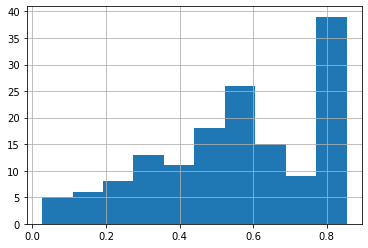

In [11]:
irisDF['silhouette_coeff'].hist()

In [12]:
irisDF['silhouette_coeff'].mean()

0.5528190123564093

----------------
### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있다.

In [18]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

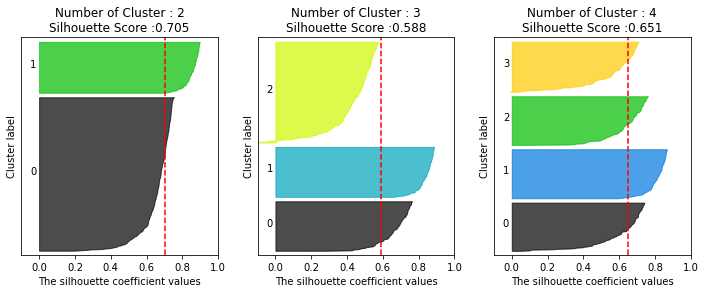

In [19]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4], X)

+ 왼쪽 부분은 개별 군집에 속하는 데이터의 실루엣 계수를 2차원으로 나타낸 것이다. 
+ X축은 실루엣 계수 값이다.
+  Y축은 개별 군집과 이에 속하는 데이터이다. 개별 군집은 Y축에 숫자 값으로 0, 1로 표시돼 있다. 이에 해당하는 데이터는 일일이 숫자 값으로 표시되지 않았지만, Y축 높이로 추측할 수 있다. 
+  점선으로 표시된 선은 전체 평균 실루엣 계수 값을 나타낸다. 

1. 클러스터의 개수를 2개로 했을 때
   + 전체 데이터의 평균 실루엣 계수 값은 약 0.705이다.
   + 1번 군집의 모든 데이터는 평균 실루엣 계수 값 이상이지만, 2번 군집의 경우는 평균보다 적은 데이터 값이 매우많다.
2. 클러스터의 개수를 3개로 했을 때
    + 전체 데이터의 평균 실루엣 계수 값은 약 0.588이다.
    + 1번, 2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만, 0번의 경우 모두 평균보다 낮다.
3. 클러스터의 개수를 4개로 했을 때
    + 전체 데이터의 평균 실루엣 계수 값은 약 0.65이다.
    + 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치하고 있다.
    + 1번 군집의 경우 모든 데이터가 평균봏다 높은 계수 값을 가지고 있으며 0번, 2번의 경우는 절반 이상이 평균보다 높은 계수 값을, 3번 군집의 경우만 약 1/3정도가 평균보다 높은 계수 값을 가지고 있다.
    + 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 4개인 경우가 가장 이상적인 군집화 개수로 판단할 수 있다.

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만,각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다. 이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야 한다.